In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from adjustText import adjust_text
from pandas import json_normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [2]:
# UMAPのverを確認
print(umap.__version__)

0.5.5


In [3]:
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["font.family"] = "IPAexGothic"

In [4]:
class CFG:
    input_dir = "../input"
    output_dir = "../output"
    random_seed = 42
    exp_no = "test_analysis"

In [5]:
train_df = pd.read_csv(f"{CFG.input_dir}/chapter2_demo_data_postprocess.csv")
train_df

,サンプルID,サンプル作成日,担当者,備考,材料１,材料２,材料３,材料４,材料５,材料６,...,乾燥温度,乾燥時間,擦過回数,擦過圧力,耐擦過性(n10,画像濃度,粘度,表面張力,保存後粘度,保存後状態
0,DP_001,45310,高岡,NaN,46.9,40,0,2,0,2.0,...,25,NaN,10,5,2.4,1.06,9.0,35,NaN,NaN
1,DP_002,45310,高岡,NaN,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.4,1.07,9.0,38,NaN,NaN
2,DP_003,45310,高岡,NaN,47.7,40,0,2,0,1.2,...,25,NaN,10,5,2.4,1.07,9.0,40,NaN,NaN
3,DP_004,45310,高岡,NaN,47.9,40,0,2,0,1.0,...,25,NaN,10,5,2.4,1.08,9.0,41,NaN,NaN
4,DP_005,45310,高岡,NaN,48.4,40,0,2,0,0.5,...,25,NaN,10,5,2.4,1.09,9.0,44,NaN,NaN
5,DP_006,45321,福原,ref,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.7,1.07,9.1,38,NaN,NaN
6,DP_007,45321,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.05,9.1,37,NaN,NaN
7,DP_008,45321,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.02,9.1,39,NaN,NaN
8,DP_009,45321,福原,NaN,45.4,40,0,2,0,1.5,...,25,NaN,10,5,3.1,1.07,10.3,36,NaN,NaN
9,DP_010,45321,福原,NaN,43.4,40,0,2,0,1.5,...,25,NaN,10,5,3.6,1.07,11.5,34,NaN,NaN


In [6]:
test_df = pd.read_csv(f"{CFG.input_dir}/chapter2_demo_data_postprocess_test.csv")
test_df

,サンプルID,サンプル作成日,担当者,備考,材料１,材料２,材料３,材料４,材料５,材料６,...,乾燥温度,乾燥時間,擦過回数,擦過圧力,耐擦過性(n10,画像濃度,粘度,表面張力,保存後粘度,保存後状態
0,DP_test_01,NaN,NaN,NaN,38.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.64,10.3,32,76.7,ゲル化
1,DP_test_02,NaN,NaN,NaN,38.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.61,10.2,32,12.6,正常
2,DP_test_03,NaN,NaN,NaN,38.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.57,10.0,32,33.7,ゲル化
3,DP_test_04,NaN,NaN,NaN,40.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.46,9.2,34,11.6,正常
4,DP_test_05,NaN,NaN,NaN,40.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.43,9.1,34,11.5,正常
5,DP_test_06,NaN,NaN,NaN,40.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.41,9.0,34,11.4,正常
6,DP_test_07,NaN,NaN,NaN,42.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.25,8.1,35,10.5,正常
7,DP_test_08,NaN,NaN,NaN,42.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.24,8.1,35,10.5,正常
8,DP_test_09,NaN,NaN,NaN,42.4,0,40,0,2,1.5,...,100,0.03,10,5,5,1.22,8.0,35,10.4,正常


In [7]:
numeric_parameter_cols = [
    # 'サンプルID', 'サンプル名', 'サンプル作成日', '担当者', '備考',
    "材料１",
    "材料２",
    "材料３",
    "材料４",
    "材料５",
    "材料６",
    "材料７",
    "材料８",
    "材料９",
    "材料１０",
    "材料１１",
    "材料１２",
    "材料１３",
    # "塗布量",
    # "乾燥方式",
    # "乾燥温度",
    # '乾燥時間',
    # "擦過回数",
    # "擦過圧力",
    # '耐擦過性(n10','画像濃度', '粘度', '表面張力', '保存後粘度'
]

In [8]:
scaler_x = StandardScaler()
scaler_x.fit(train_df[numeric_parameter_cols])
scaler_x

StandardScaler()

In [9]:
X_train = scaler_x.transform(train_df[numeric_parameter_cols])
X_train

array([[ 1.00830673,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         1.53976945, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ],
       [ 1.16797142,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         0.31831772, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ],
       [ 1.26377024,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.41455331, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ],
       [ 1.32763612,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.903134  , -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ],
       [ 1.48730081,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -2.12458573, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ],
       [ 1.16797142,  0.755928

In [10]:
X_test = scaler_x.transform(test_df[numeric_parameter_cols])
X_test

array([[-1.70599306, -1.32287566,  1.32017716, -1.18585412,  0.99124071,
         0.31831772, -0.1767767 , -0.1767767 , -1.55779945,  3.04055916,
         0.63867709, -0.2943724 ,  0.        ],
       [-1.70599306, -1.32287566,  1.32017716, -1.18585412,  0.99124071,
         0.31831772, -0.1767767 , -0.1767767 ,  0.12768848,  1.76776695,
         0.63867709, -0.2943724 ,  0.        ],
       [-1.70599306, -1.32287566,  1.32017716, -1.18585412,  0.99124071,
         0.31831772, -0.1767767 , -0.1767767 ,  1.81317641,  0.49497475,
         0.63867709, -0.2943724 ,  0.        ],
       [-1.06733428, -1.32287566,  1.32017716, -1.18585412,  0.99124071,
         0.31831772, -0.1767767 , -0.1767767 , -1.55779945,  2.19203102,
         0.63867709, -0.2943724 ,  0.        ],
       [-1.06733428, -1.32287566,  1.32017716, -1.18585412,  0.99124071,
         0.31831772, -0.1767767 , -0.1767767 , -0.43414083,  1.34350288,
         0.63867709, -0.2943724 ,  0.        ],
       [-1.06733428, -1.322875

In [11]:
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15

result_umap = umap_.fit(X_train)
result_umap

/Users/takaharawataru/anaconda3/envs/local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


UMAP(n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [12]:
X_train_umap = result_umap.transform(X_train)
X_train_umap

array([[24.449682  , -5.515941  ],
       [24.662865  , -5.2759585 ],
       [25.3118    , -5.778727  ],
       [25.644531  , -5.9978304 ],
       [25.777502  , -6.0538607 ],
       [24.969427  , -5.4971404 ],
       [25.942728  , -5.7315645 ],
       [25.486837  , -6.233197  ],
       [23.73357   , -5.566999  ],
       [20.473291  , -5.0722938 ],
       [20.933113  , -5.2036357 ],
       [25.162764  , -5.0181966 ],
       [24.907167  , -4.8103347 ],
       [25.112242  , -4.479372  ],
       [20.075281  , -5.504535  ],
       [20.279766  , -5.8672895 ],
       [20.258377  , -5.379358  ],
       [20.549297  , -5.5425763 ],
       [20.98368   , -4.936138  ],
       [ 0.49931416,  1.7012538 ],
       [21.055391  , -5.508146  ],
       [20.549864  , -4.8541555 ],
       [ 0.04659586,  1.9719464 ],
       [ 0.04977097,  2.423223  ],
       [-0.22448216,  2.138564  ],
       [ 0.31657836,  1.5232527 ],
       [ 0.03286494,  1.5060288 ],
       [-0.342792  ,  1.5129538 ],
       [-0.27878022,

In [13]:
X_test_umap = result_umap.transform(X_test)
X_test_umap

array([[-1.8990644 ,  1.97591   ],
       [-0.9357317 ,  1.3267378 ],
       [-0.8281998 ,  1.2087746 ],
       [-1.8702372 ,  2.9100456 ],
       [-1.0671408 ,  1.5870025 ],
       [-0.6148006 ,  0.91295004],
       [-0.996526  ,  3.047824  ],
       [-1.0257593 ,  1.4273267 ],
       [ 0.8101253 ,  2.4779098 ]], dtype=float32)

In [14]:
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])
test_umap_df = pd.DataFrame(X_test_umap, columns=["UMAP1", "UMAP2"])

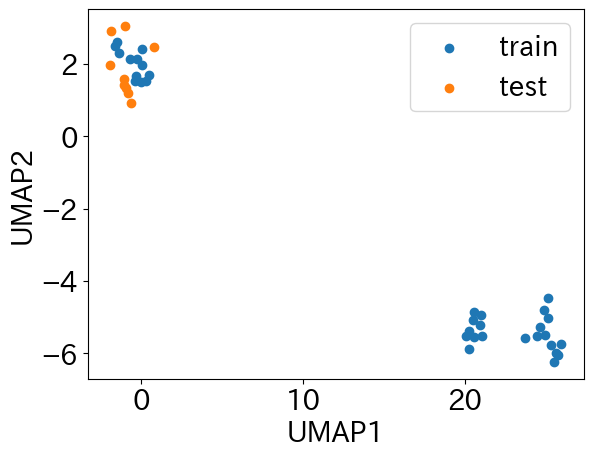

In [15]:
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.scatter(test_umap_df["UMAP1"], test_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(["train", "test"])
plt.show()

               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


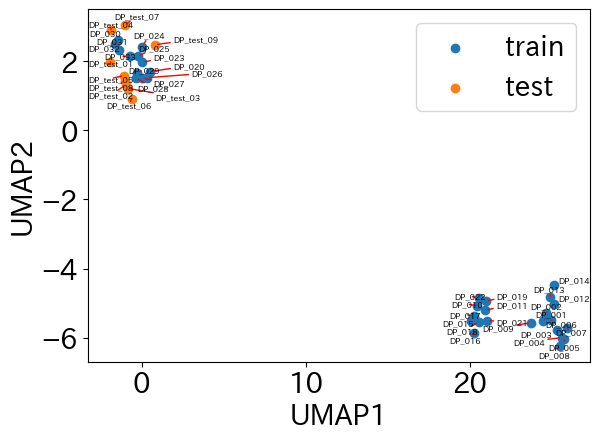

In [16]:
fig, ax = plt.subplots()
ax.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"], label='train')
ax.scatter(test_umap_df["UMAP1"], test_umap_df["UMAP2"], label='test')

# テキストのサイズを小さく設定
texts = [
    ax.text(x, y, s, fontsize=6)
    for x, y, s in zip(
        train_umap_df["UMAP1"].values,
        train_umap_df["UMAP2"].values,
        train_df["サンプルID"].values,
    )
]
texts += [
    ax.text(x, y, s, fontsize=6)
    for x, y, s in zip(
        test_umap_df["UMAP1"].values,
        test_umap_df["UMAP2"].values,
        test_df["サンプルID"].values,
    )
]

# adjust_textを使用してテキストが重ならないように調整
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))

# 軸ラベルと凡例の設定
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()
